Q2. Your task is to create a KNN model and predict the potential risk of heart disease.

• Importing the appropriate libraries

In [3]:
#importing the appropriate libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from tabulate import tabulate



• Loading the dataset

In [4]:
# loading the dataset using pandas.

heartdata = pd.read_csv("data-heart.csv")

• Printing the length of the dataset

In [5]:
#printing the length of the dataset.

print("Length of the Dataset is:",len(heartdata))

Length of the Dataset is: 303


• Printing the first 5 rows of the dataset

In [6]:
#using "head" method.

heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


• Splitting the dataset for training and testing, 80% for training and 20% for testing

In [7]:
#this is actually the first 13 columns from (0-12) as the last column is the output column
X = heartdata.iloc[:, 0:13]
#this is the output column.
Y = heartdata.iloc[:, 13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

• Feature Scaling

In [8]:
#We will the scale the data so that it is all between 1 and 1

scaler_X = StandardScaler()

#Transforming the scaling set as well as the testing set.
#We only train the X (inputs) values, not the Y values.

#we fit the scaler with the training set.
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

• Identifying the appropriate number of neighbours for the KNN algorithm

In [9]:
#using math's sqrt method.
math.sqrt(len(Y_test))

7.810249675906654

7.8 is nearest to the odd number 7 so, trying all the odd numbers after 7 one by one. 13 is the most accurate. 

• Defining and Fitting the model

In [10]:
#Defining the model 
#here, p = 2 means the person has heart disease or not.
k = 13
classifier = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'euclidean')

#fitting the model
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

• Predicting results from the test set

In [11]:
#predictin the models results
Y_pred = classifier.predict(X_test)
#printing the results.
Y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

• Evaluating the model using Confusion matrix and other measures

In [12]:
#Evaluating the model using confusion matrix and other measures.

#confusion matrix
cmatrixi = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cmatrixi)
print()

#f1 score
fscorei = f1_score(Y_test, Y_pred)
print(f"f1 score: {fscorei:.2f}")

print()

#accuracy score
ascorei = accuracy_score(Y_test, Y_pred) 
print(f"Accuracy: {ascorei:.2f}")

Confusion Matrix:
[[20  7]
 [ 2 32]]

f1 score: 0.88

Accuracy: 0.85


Above were the steps to import libraries, load dataset, printing the first 5 rows, splitting the dataset for training and testing, feature scaling, identifying the 'appropriate' number of neighbours, defining and fitting the model, predicting and evaluating the model.


Now, I will run define, fit, scale, predict the dataset again to find the best k and random state values to obtain the best accuracy, confusion matrix and f1 score.

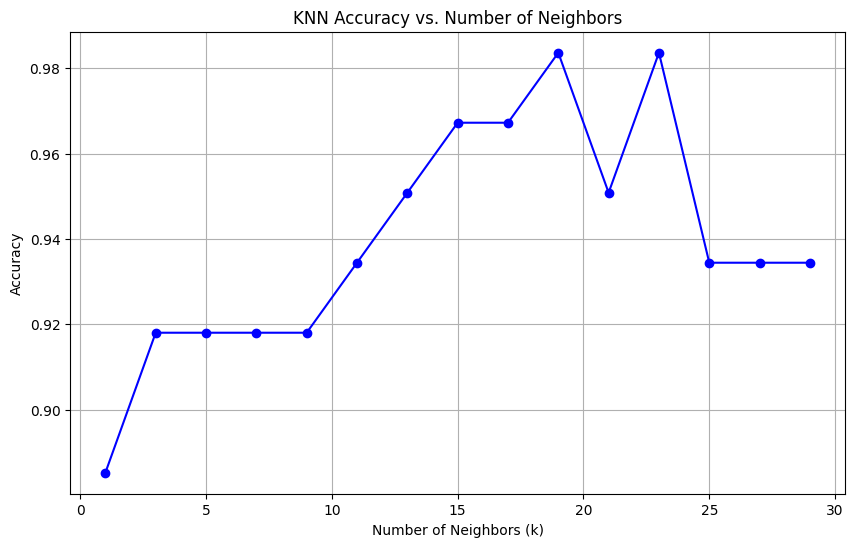

Best k: 19, Best Random Seed: 72, Max Accuracy: 0.9836065573770492


In [13]:
#defining the range in which k will be taken from,
odd_k_values = [k for k in range(1, 31) if k % 2 == 1]
k_accuracies = {}  # Dictionary to store accuracies for each k

#1st for Loop to check against all k values in the list.
for k in odd_k_values:
    #decarling the variable to store best random state
    best_rs_for_k = None

    #declaring the variable to store the max accuracy for k.
    max_accuracy_for_k = 0

    #2nd loop to check all the rs values mentioned in the range
    for rs in range(1, 100):

        #training the model one by one with all the different values of random state
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=rs, test_size=0.2)

        #feature scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        #defining the model with different k values.
        classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')

        #fitting the model
        classifier.fit(X_train, Y_train)

        #predicting the target values
        Y_pred = classifier.predict(X_test)

        #checking the accuracy of the model
        accuracy = accuracy_score(Y_test, Y_pred)

        #if statement to store the maximum accuracy found from all the iterations into a variable
        if accuracy > max_accuracy_for_k:
            max_accuracy_for_k = accuracy

            #storing the random state of the k value with the most accuracy
            best_rs_for_k = rs

    #storing the max accuracy and the k for that accuracy in a list.
    k_accuracies[k] = (max_accuracy_for_k, best_rs_for_k)

# Find the best k and its corresponding random seed and accuracy
best_k = max(k_accuracies, key=lambda k: k_accuracies[k][0])
best_rs = k_accuracies[best_k][1]
max_accuracy = k_accuracies[best_k][0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_accuracies.keys(), [acc for acc, _ in k_accuracies.values()], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

print(f"Best k: {best_k}, Best Random Seed: {best_rs}, Max Accuracy: {max_accuracy}") 

Best K is found to be 19
Best Random Seed is found to be 72

New prediction using the recommended values.

Spliting the dataset

In [14]:
# Split the dataset into training and testing sets USING THE ABOVE FOUND RANDOM STATE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=best_rs)

Feature Scaling

In [15]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the model USING THE ABOVE FOUND K VALUE

In [16]:
#Train the model USING THE ABOVE FOUND K VALUE
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
Y_pred = knn_best.predict(X_test)

Evalute the NEW MODEL

In [17]:
#Evaluating the model using confusion matrix and other measures.

#confusion matrix
cmatrixf = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cmatrixf)
print()

#f1 score
fscoref = f1_score(Y_test, Y_pred)
print(f"f1 score: {fscoref:.2f}")

print()

#accuracy score
ascoref = accuracy_score(Y_test, Y_pred) 
print(f"Accuracy: {ascoref:.2f}")

Confusion Matrix:
[[22  1]
 [ 0 38]]

f1 score: 0.99

Accuracy: 0.98


Comparing the previous results and the current results.

In [18]:


table_data = [
    ["Confusion Matrix", f"{cmatrixi[0]}\n{cmatrixi[1]}", f"{cmatrixf[0]}\n{cmatrixf[1]}"],
    ["F1 Score", f"{fscorei:.2f}", f"{fscoref:.2f}"],
    ["Accuracy", f"{ascorei:.2f}", f"{ascoref:.2f}"]
]

# Print the table using tabulate
print(tabulate(table_data, headers=["Metric", "Initial", "Final"], tablefmt="grid"))

+------------------+-----------+---------+
| Metric           | Initial   | Final   |
+==================+===========+=========+
| Confusion Matrix | [20  7]   | [22  1] |
|                  | [ 2 32]   | [ 0 38] |
+------------------+-----------+---------+
| F1 Score         | 0.88      | 0.99    |
+------------------+-----------+---------+
| Accuracy         | 0.85      | 0.98    |
+------------------+-----------+---------+
